## Imports

In [2]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

[nltk_data] Downloading package punkt to /home/tl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df_true = pd.read_csv("True.csv")
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
df_false = pd.read_csv("Fake.csv")
df_false

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
df_true['isfake'] = 1
df_false['isfake'] = 0

In [7]:
main_df = pd.concat([df_false,df_true]).reset_index(drop = True)
main_df

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


## Removing unnecessary data (columns)

In [10]:
main_df.drop(columns=['date'],inplace=True)

In [11]:
main_df['original'] = main_df['title'] + " " + main_df['text']
main_df

,title,text,subject,isfake,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,'Fully committed' NATO backs new U.S. approach...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,LexisNexis withdrew two products from Chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,Minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,Vatican upbeat on possibility of Pope Francis ...


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from','subject','re','edu','use'])

In [14]:
def remove_stopwords(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) > 3 and token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(token)
    return result

In [15]:
main_df['words'] = main_df['original'].apply(remove_stopwords)

In [16]:
main_df

,title,text,subject,isfake,original,words
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, sends, embarrassing, year, mes..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian ...,"[drunk, bragging, trump, staffer, started, rus..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke...,"[sheriff, david, clarke, internet, joke, threa..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[trump, obsessed, obama, coded, website, image..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, called, donald, trump, christm..."
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,'Fully committed' NATO backs new U.S. approach...,"[fully, committed, nato, backs, approach, afgh..."
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,LexisNexis withdrew two products from Chinese ...,"[lexisnexis, withdrew, products, chinese, mark..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,Minsk cultural hub becomes haven from authorit...,"[minsk, cultural, authorities, minsk, reuters,..."
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,Vatican upbeat on possibility of Pope Francis ...,"[vatican, upbeat, possibility, pope, francis, ..."


In [18]:
all_words = []
for li in main_df.words:
    for liw in li:
        all_words.append(liw)

In [20]:
all_words,len(all_words)

(['donald',
  'trump',
  'sends',
  'embarrassing',
  'year',
  'message',
  'disturbing',
  'donald',
  'trump',
  'wish',
  'americans',
  'happy',
  'year',
  'leave',
  'instead',
  'shout',
  'enemies',
  'haters',
  'dishonest',
  'fake',
  'news',
  'media',
  'reality',
  'star',
  'country',
  'rapidly',
  'grows',
  'stronger',
  'smarter',
  'want',
  'wish',
  'friends',
  'supporters',
  'enemies',
  'haters',
  'dishonest',
  'fake',
  'news',
  'media',
  'happy',
  'healthy',
  'year',
  'president',
  'angry',
  'pants',
  'tweeted',
  'great',
  'year',
  'america',
  'country',
  'rapidly',
  'grows',
  'stronger',
  'smarter',
  'want',
  'wish',
  'friends',
  'supporters',
  'enemies',
  'haters',
  'dishonest',
  'fake',
  'news',
  'media',
  'happy',
  'healthy',
  'year',
  'great',
  'year',
  'america',
  'donald',
  'trump',
  'realdonaldtrump',
  'december',
  'trump',
  'tweet',
  'went',
  'welll',
  'expect',
  'kind',
  'president',
  'sends',
  'year'

In [23]:
main_df['sentense'] = main_df['words'].apply(lambda x: " ".join(x))
main_df

,title,text,subject,isfake,original,words,sentense
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, sends, embarrassing, year, mes...",donald trump sends embarrassing year message d...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian ...,"[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke...,"[sheriff, david, clarke, internet, joke, threa...",sheriff david clarke internet joke threatening...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[trump, obsessed, obama, coded, website, image...",trump obsessed obama coded website images chri...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, called, donald, trump, christm...",pope francis called donald trump christmas spe...
...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,'Fully committed' NATO backs new U.S. approach...,"[fully, committed, nato, backs, approach, afgh...",fully committed nato backs approach afghanista...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,LexisNexis withdrew two products from Chinese ...,"[lexisnexis, withdrew, products, chinese, mark...",lexisnexis withdrew products chinese market lo...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,Minsk cultural hub becomes haven from authorit...,"[minsk, cultural, authorities, minsk, reuters,...",minsk cultural authorities minsk reuters shado...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,Vatican upbeat on possibility of Pope Francis ...,"[vatican, upbeat, possibility, pope, francis, ...",vatican upbeat possibility pope francis visiti...


## Visualization

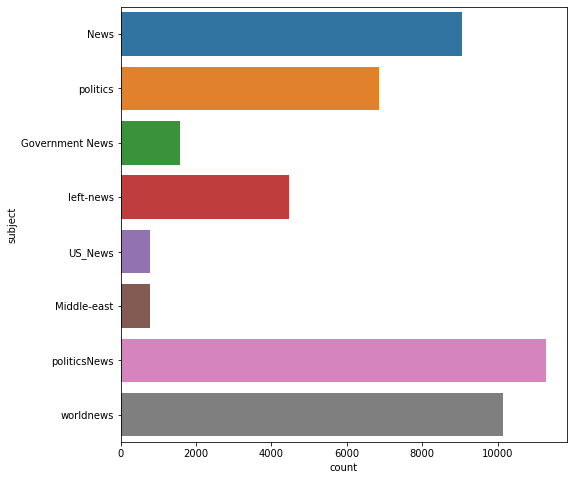

In [24]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = main_df)

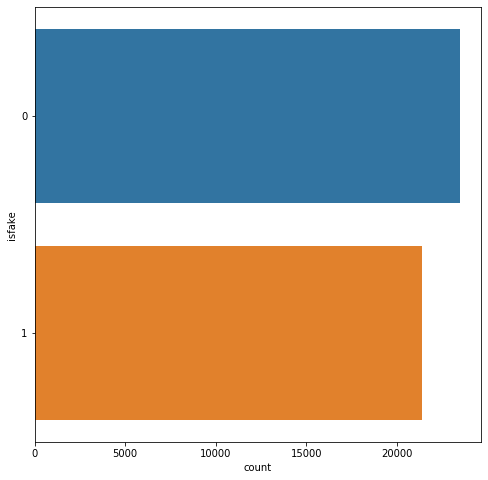

In [26]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = main_df)

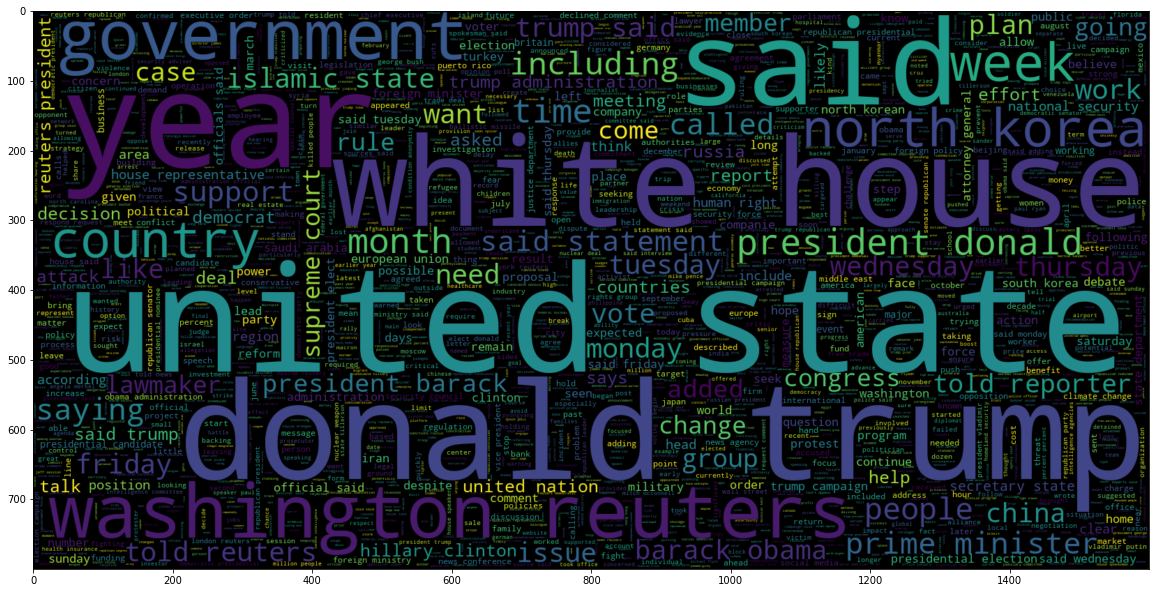

In [27]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(main_df[main_df.isfake == 1].sentense))
plt.imshow(wc, interpolation = 'bilinear')

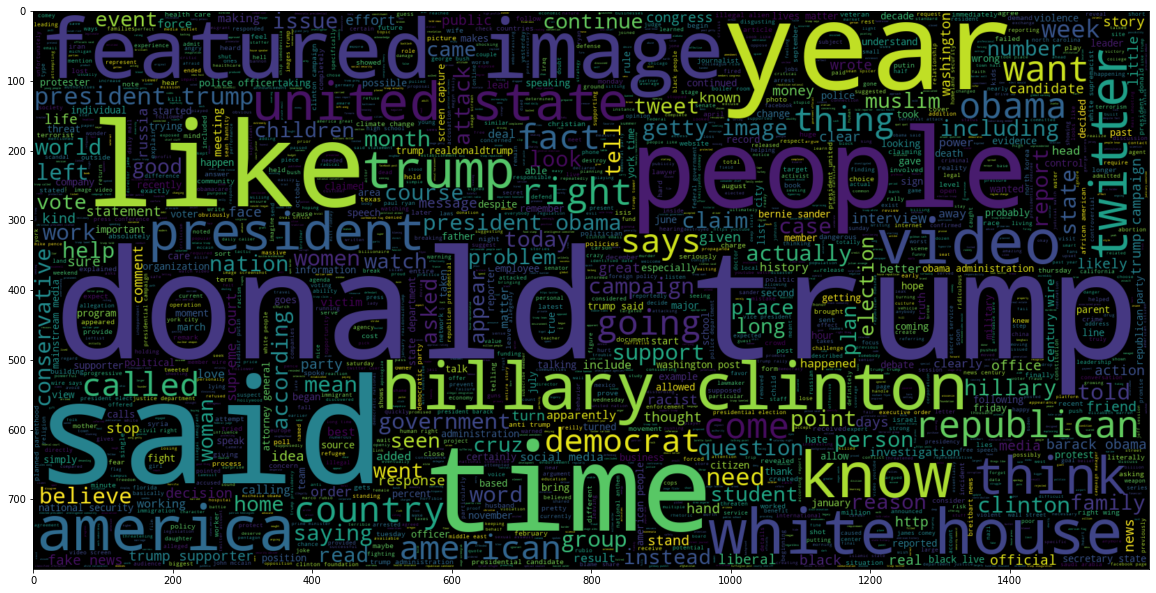

In [28]:
# plot the word cloud for text that is Not Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(main_df[main_df.isfake == 0].sentense))
plt.imshow(wc, interpolation = 'bilinear')

In [29]:
max_sentense_len = 0
for doc in main_df.sentense:
    tokens = nltk.word_tokenize(doc)
    if max_sentense_len < len(tokens):
        max_sentense_len = len(tokens)
    
max_sentense_len

4405

## TOKENIZER

Tokenizer allows us to vectorize text corpus by turning each text into a sequence of integers

In [31]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(main_df.sentense, main_df.isfake, test_size = 0.2)

In [35]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
from nltk import word_tokenize

total_words = len(list(set(all_words)))
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [36]:
print("The encoding for document\n",main_df.sentense[0],"\n is : ",train_sequences[0])

The encoding for document
 donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december use

In [37]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [38]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 3581  5761   213   329     1    42     9   235     4  1910  5761   213
  4142     3   547    10     1  2462    42   233    60    44     9   341
    28   246     1   884   189     4   329    42  1611 20078  1174    87
  3307    66   343   215]
The padded encoding for document 2  is :  [    1 14100   353   812   287    56    95     9  2427  1368  1167    56
     2     3    10     1  2964 14100   812  1319    83  3719  5498    16
    12   739   353   319     1   381   132    15     8  2180  6441   497
  1873  4413   353    88]


## LSTM Model 

In [42]:
# Sequential Model
model = Sequential()

# embeddidng layer
# model.add(Embedding(total_words, output_dim = 128))
model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 240)         26089200  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               377856    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 26,500,081
Trainable params: 26,500,081
Non-trainable params: 0
_________________________________________________________________


In [43]:
y_train = np.asarray(y_train)

In [44]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Train on 32326 samples, validate on 3592 samples
Epoch 1/2
32326/32326 [==============================] - 36s 1ms/sample - loss: 0.0386 - acc: 0.9846 - val_loss: 0.0031 - val_acc: 0.9992
Epoch 2/2
32326/32326 [==============================] - 36s 1ms/sample - loss: 6.5710e-04 - acc: 0.9999 - val_loss: 0.0044 - val_acc: 0.9992


In [46]:
pred = model.predict(padded_test)
pred

array([[1.0000000e+00],
       [5.8319849e-01],
       [2.8908253e-06],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [47]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [48]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9842984409799554


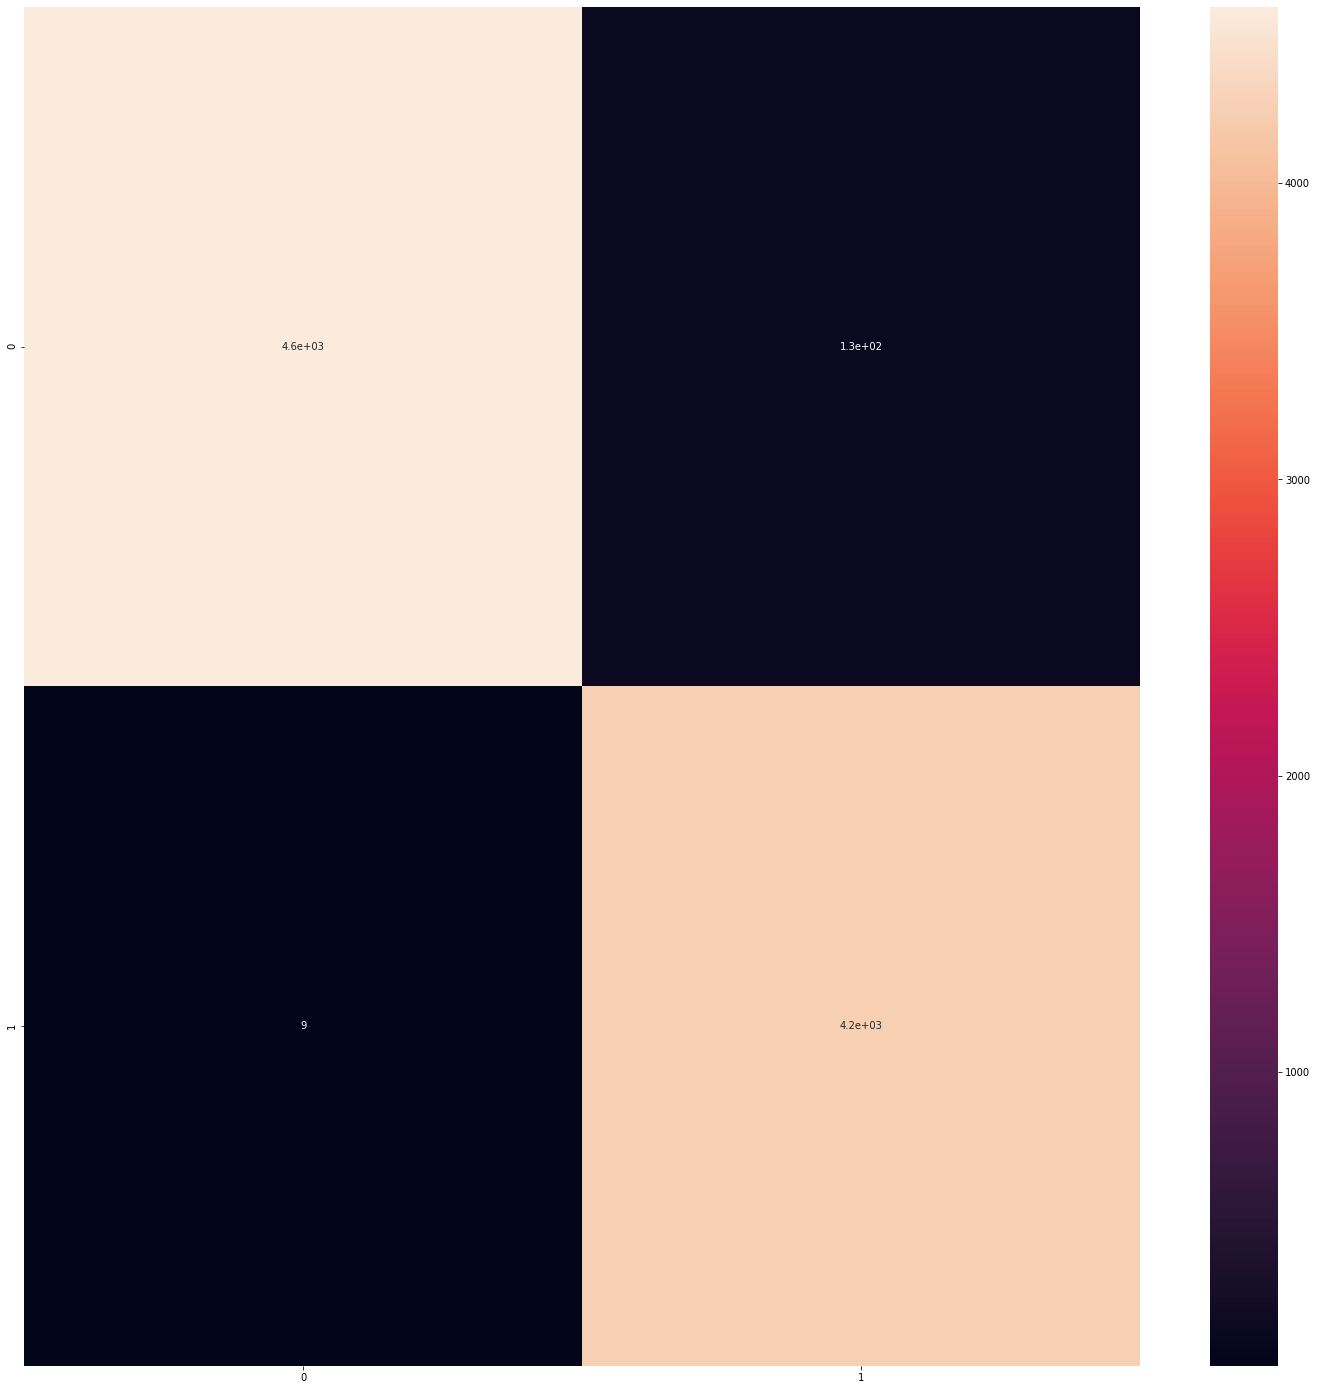

In [49]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)